# PCA

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisdf = pd.DataFrame(iris.data, columns=columns)
irisdf['target'] = iris.target
irisdf.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


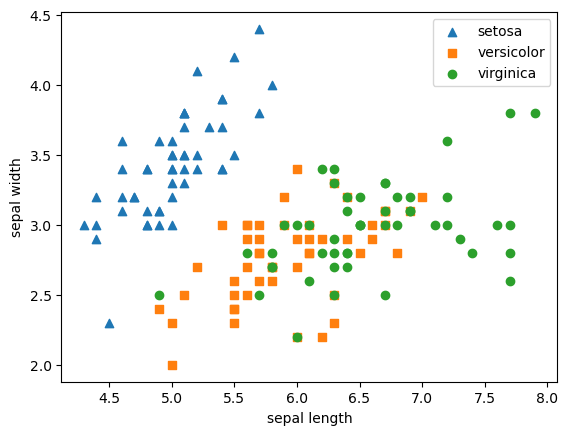

In [3]:
# 두 개의 속성을 x축과 y축으로 해 데이터의 분포 살펴보기
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf[irisdf['target']==i]['sepal_length']
    y_axis_data = irisdf[irisdf['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisdf.iloc[:, :-1]) # 마지막 열 = target을 제외하고 스케일로 변환

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 차원을 가진 pca 만들기

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)
# transform 메서드를 통해서 원본 데이터 세트를 2차원으로 변환

(150, 2)


In [10]:
# 새롭게 정의된 열을 새로 명명
pca_columns = ['pca_component1', 'pca_component2']
irisdf_pca = pd.DataFrame(iris_pca, columns=pca_columns) # 먼저 주성분으로만 데이터 프레임을 만들고 열이름 새로 붙여줌
irisdf_pca['target'] = iris.target # 그리고 그 열에 target 값 새로 붙여줌
irisdf_pca.head(3)

,pca_component1,pca_component2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


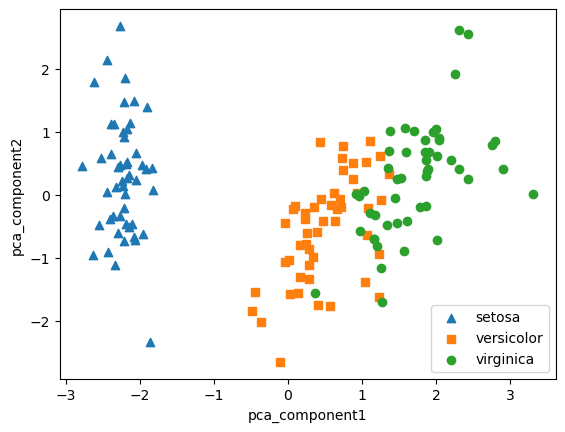

In [12]:
# 두 개의 속성을 x축과 y축으로 해 데이터의 분포 살펴보기
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisdf_pca[irisdf_pca['target']==i]['pca_component1']
    y_axis_data = irisdf_pca[irisdf_pca['target']==i]['pca_component2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component1')
plt.ylabel('pca_component2')
plt.show()

# pca를 사용하고 나서 보다 잘 분리된 것을 확인할 수 있음

In [13]:
print(pca.explained_variance_ratio_)
# 첫번째 주성분이 전체 변동성의 약 72.9%를 차지

[0.72962445 0.22850762]


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [15]:
pca_X = irisdf_pca[['pca_component1', 'pca_component2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [16]:
import pandas as pd

df = pd.read_excel('C:/Users/sgsgk/Documents/machine-learning-example-data/pca_credit_card.xls',
                   header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [17]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

<AxesSubplot:>

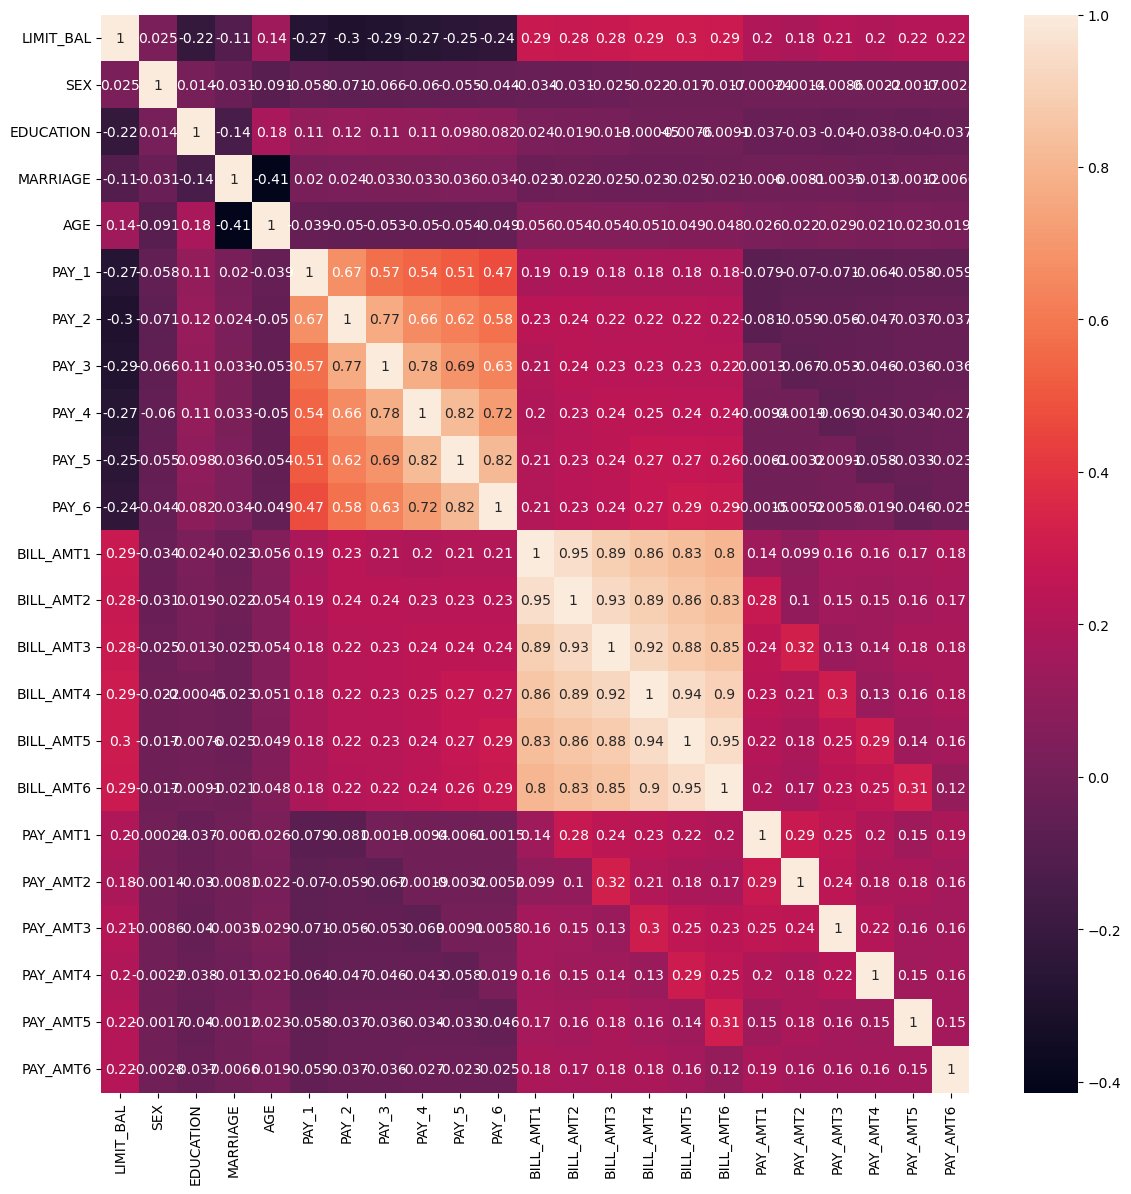

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.2g')

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 먼저 상관관계가 높은 bill_atmt 변수를 리스트에 저장
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 위의 리스트에 있는 상관관계가 높은 변수들을 2개로 압축하는 주성분을 만들거임
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)
print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 FOLD 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도: {0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 FOLD 세트별 정확도: [0.7909 0.7983 0.8037]
PCA 변환 데이터 세트 평균 정확도: 0.7976
